In [2]:
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt
from sklearn import preprocessing



# Define column names
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load the .txt file (comma-separated)
df = pd.read_csv('../datasets/adult/adult.data', names=columns, sep=r'\s*,\s*', engine='python', skiprows=1)
df_test = pd.read_csv("../datasets/adult/adult.test",names=columns, sep=r'\s*,\s*', engine='python', skiprows=1)


# Create training and testing variables
Y_train = (df["income"] == ">50K").astype(int)
Y_sen_train = (df["sex"] == "Female").astype(int)   # Encode sex: Female -> 1, Male -> 0
     # One-hot encode categorical variables

Y_test = (df_test["income"] == ">50K.").astype(int)
Y_sen_test = (df_test["sex"] == "Female").astype(int)





In [3]:
X_train = df.drop(columns=["sex", "income", "fnlwgt"]) 


In [4]:
X_train = pd.get_dummies(X_train, drop_first=True) 

In [5]:
zero_pct = (X_train["capital-gain"] == 0).mean() * 100
print(f"Percentage of rows with capital-gain = 0: {zero_pct:.2f}%")

Percentage of rows with capital-gain = 0: 91.67%


In [6]:
zero_pct = (X_train["capital-loss"] == 0).mean() * 100
print(f"Percentage of rows with capital-gain = 0: {zero_pct:.2f}%")

Percentage of rows with capital-gain = 0: 95.33%


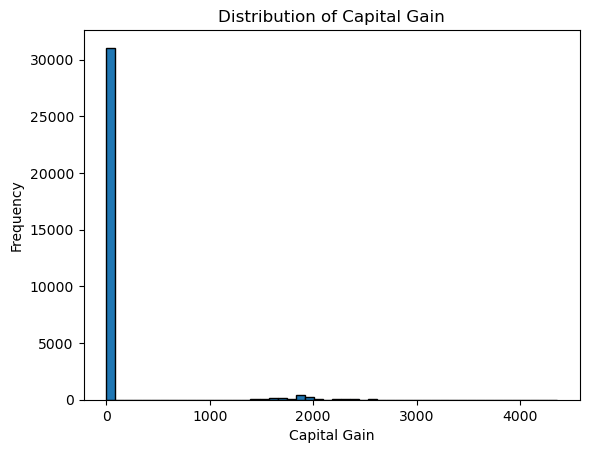

In [7]:
plt.hist(X_train["capital-loss"], bins=50, edgecolor="k")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.title("Distribution of Capital Gain")
plt.show()

In [8]:
for col in X_train.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print(X_train[col].unique())

In [9]:
     # Prepare X_train (features without sensitive attribute and without target)
X_train = pd.get_dummies(X_train, drop_first=True) 

In [10]:
X_test = df_test.drop(columns=["sex", "income", "fnlwgt"])
X_test = pd.get_dummies(X_test, drop_first=True)

print(Y_test.unique())
# Align columns
X_train, X_test = X_train.align(X_test, join="left", axis=1)

# Fill NaNs from missing categories in test with 0
X_test = X_test.fillna(0)
Y_test = Y_test.loc[X_test.index]
Y_sen_test = Y_sen_test.loc[X_test.index]

[0 1]


In [11]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(exclude=["int64", "float64"]).columns

# Initialize scaler
scaler =  preprocessing.StandardScaler()

# Fit and transform only numeric columns
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])

# Convert back to DataFrame to keep column names
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)

# Concatenate scaled numeric columns with untouched categorical columns
X_train_scaled = pd.concat([X_train_num_scaled, X_train[cat_cols]], axis=1)

X_test_num_scaled = scaler.transform(X_test[num_cols])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)
X_test_scaled = pd.concat([X_test_num_scaled, X_test[cat_cols]], axis=1)

In [12]:
print(X_train_scaled[num_cols].mean())
print(X_train_scaled[num_cols].std())


age               1.968395e-16
education-num     5.281061e-17
capital-gain     -1.964031e-17
capital-loss      4.517271e-17
hours-per-week    2.869667e-16
dtype: float64
age               1.000015
education-num     1.000015
capital-gain      1.000015
capital-loss      1.000015
hours-per-week    1.000015
dtype: float64
